# Correlation plot


<img src="files/images/correlation_matrix.png" height="800" width="800">

A correlation matrix plot shows the correlation between different variables of a dataset. It is really useful when analysing the correlation between features before building a machine learning model.

The goal of this exercise is to plot a correlation matrix for a set of features of the wine data set. You have to get a  similar figure to the one shown above:
* For the elements in the diagonal of the matrix, plot the histogram of the *i* th feature using 15 bins.
  * Use the name of the feature as title of the histogram.
* For the elements above and below the diagonal of the matrix, show a scatter plot of the *i* th feature versus the *j* th.
  * Use the names of the *i* th and the *j* th feature on the axes of the figure.
  * Compute the correlation between the features and use it as the subplot title. **Tip:** use the following code to compute the correlation between two variables:
```
from numpy import corrcoef
corr = corrcoef(x, y)[0, 1]
```
  * Use red 'x's for the red wine samples.
  * Set the right axes limits for the individual subplots.
* In order to make the figure look nicer, do this at the very end of your code:
```
plt.tight_layout()
```

You can use the code below in order to read the data in. It reduces the original dataset to the ones we will plot on the correlation matrix.

You can get the names of the features you will need for the axes labels from the `features` array.

**Hint:** use two nested `for` loops for plotting the graphs.

In [37]:
import pandas as pd

# We read the data in
red_wines = pd.read_csv("../data/winequality-red.csv", sep=';', index_col='name')

# We select the features we want to plot
# You can use this list for labelling your plots
features = ['fixed acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']
red_wines = red_wines[features]

In [38]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, r0000 to r1598
Data columns (total 4 columns):
fixed acidity           1599 non-null float64
citric acid             1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
dtypes: float64(4)
memory usage: 62.5+ KB


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import corrcoef

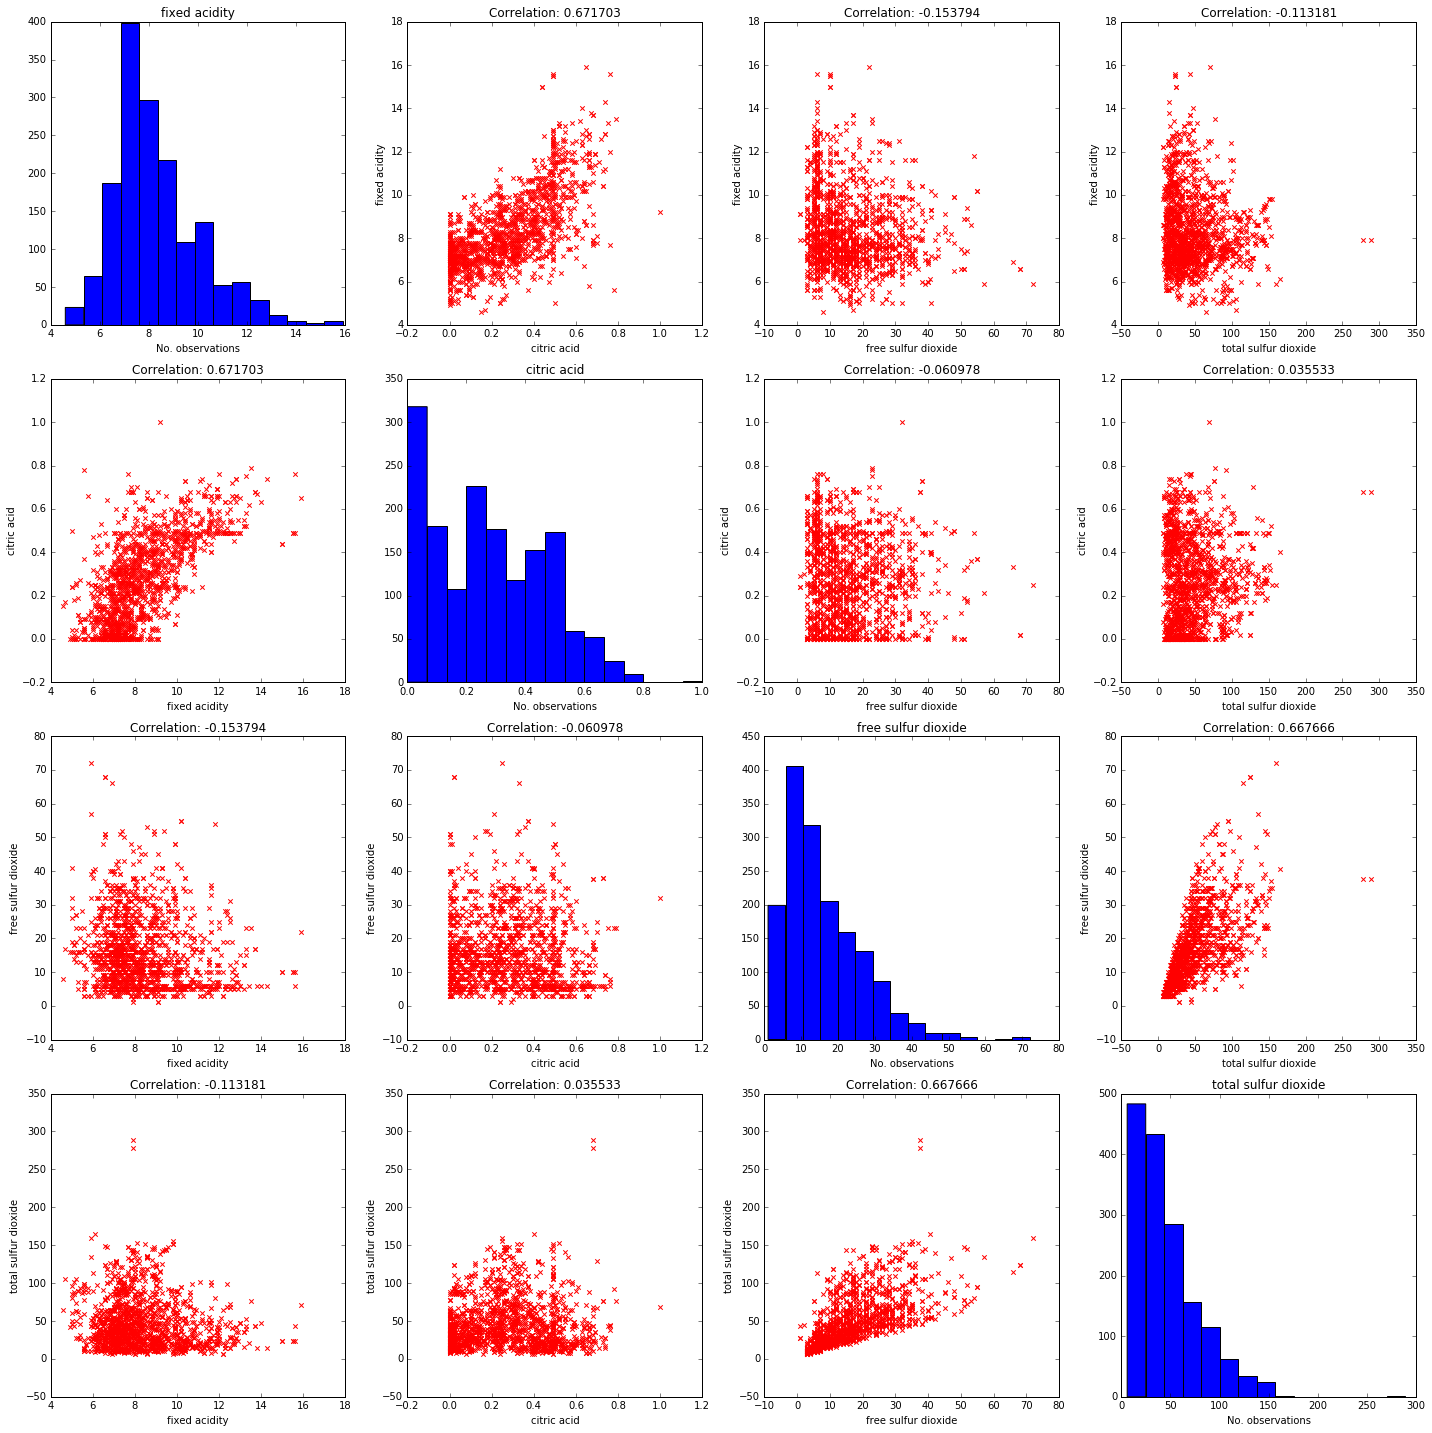

In [40]:
# Exercise done by Allen

# Set the figure size in inches
plt.figure(figsize=(20,20), dpi=300)

# Set the range of values
MAX_ROWS = 4
MAX_COLS = 4

# Get a list of fields to iterate over
fields_list = ['fixed acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']

# Counter for sub-plots
plot_counter = 0
for row_counter in range(MAX_ROWS):
    for col_counter in range(MAX_COLS):
        plot_counter += 1
        # The subplot counter runs in continuous values and goes from L-R
        plt.subplot(4, 4, plot_counter)
        
        # Only the diagonal values are histograms
        if row_counter == col_counter:
            plt.hist(red_wines[fields_list[row_counter]], bins=15, color='b')
            plt.xlabel('No. observations')
            plt.title(fields_list[row_counter])
        else:
            # Non-diagonal values are all scatter plots
            x_values = red_wines[fields_list[col_counter]].values
            y_values = red_wines[fields_list[row_counter]].values
            plt.scatter(red_wines[fields_list[col_counter]], red_wines[fields_list[row_counter]], c='r', marker='x')
            plt.xlabel(fields_list[col_counter])
            plt.ylabel(fields_list[row_counter])
            
            # Calculate correlation for the title
            corr = corrcoef(x_values, y_values)[0, 1]
            plt.title('Correlation: %f' % corr)
        # Add a spacer around the graphs
        plt.tight_layout()